In [181]:
import pandas as pd      # Used for loading, cleaning, and manipulating data
import matplotlib.pyplot as plt # used to plot time series trends, forecasts, and errors.
import numpy as np   # Provides fast numerical computations using arrays and matrices.
import warnings     # Used to control warning messages shown by Python libraries
warnings.filterwarnings("ignore")    # Suppresses all warning messages.
from utilsforecast.plotting import plot_series    # utility function to plot actual vs predicted time series easily
from utilsforecast.evaluation import evaluate     # Used to calculate model performance metrics automatically.
from utilsforecast.losses import *   # Imports error/loss functions like MAE, RMSE, MAPE, etc. Used to quantify how accurate your forecasts are.


In [182]:
df = pd.read_csv("german_bakery_items.csv", parse_dates=["ds"])   # df = pd.read_csv("daily_sales_german_bakery.csv", parse_dates=["ds"])
df = df.groupby("unique_id").filter(lambda x: len (x) >=28)   # Groups the data by each product (unique_id). Keeps only those time series that have at least 28 observations (days). Because many forecasting models need a minimum history window (e.g., 4 weeks).
df = df.drop(["unit_price"], axis = 1)    # axis = 1 means Work on columns not only on a single row of price 
df.head()

,unique_id,ds,y
0,german_bakery_item_1,2024-01-01,73
1,german_bakery_item_1,2024-01-02,62
2,german_bakery_item_1,2024-01-03,59
3,german_bakery_item_1,2024-01-04,46
4,german_bakery_item_1,2024-01-05,70


In [183]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  4000 non-null   object        
 1   ds         4000 non-null   datetime64[ns]
 2   y          4000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 125.0+ KB


In [184]:
df["unique_id"].value_counts().min()   # Every bakery product has at least 400 days of sales data i.e. >=28 days

np.int64(400)

In [185]:
df["unique_id"].unique()

array(['german_bakery_item_1', 'german_bakery_item_2',
       'german_bakery_item_3', 'german_bakery_item_4',
       'german_bakery_item_5', 'german_bakery_item_6',
       'german_bakery_item_7', 'german_bakery_item_8',
       'german_bakery_item_9', 'german_bakery_item_10'], dtype=object)

In [186]:
df["unique_id"].nunique()


10

In [187]:
df["ds"].max()

Timestamp('2025-02-03 00:00:00')

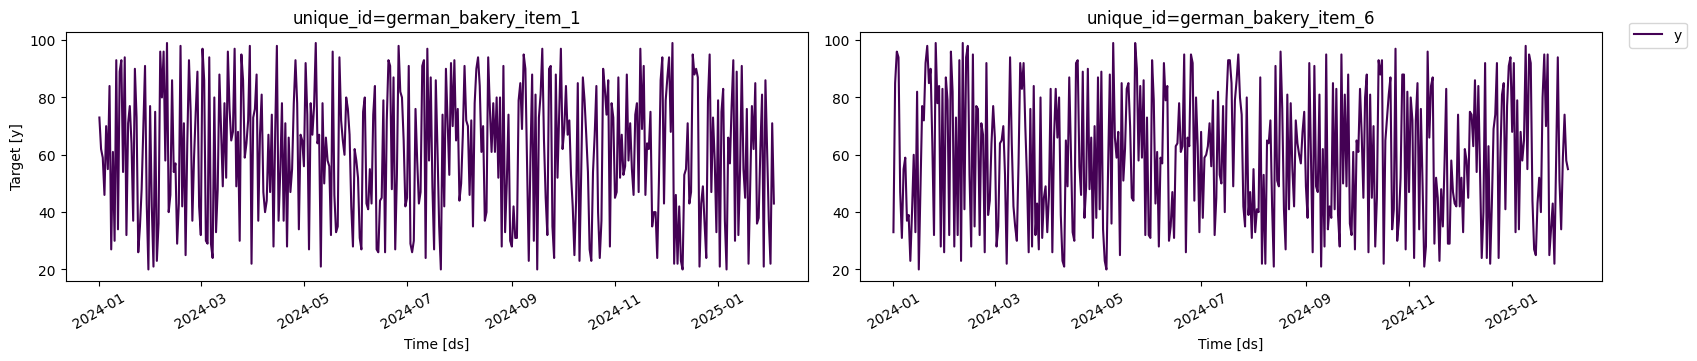

In [188]:
plot_series(         # Helper function from utilsforecast.plotting.It is used to visualize time series data quickly and correctly.
    df=df,
    ids=["german_bakery_item_1", "german_bakery_item_6"],
    palette="viridis"   # palette="viridis" defines the color scheme of the plot. viridis is a clean, professional, color-blind–friendly palette 
)


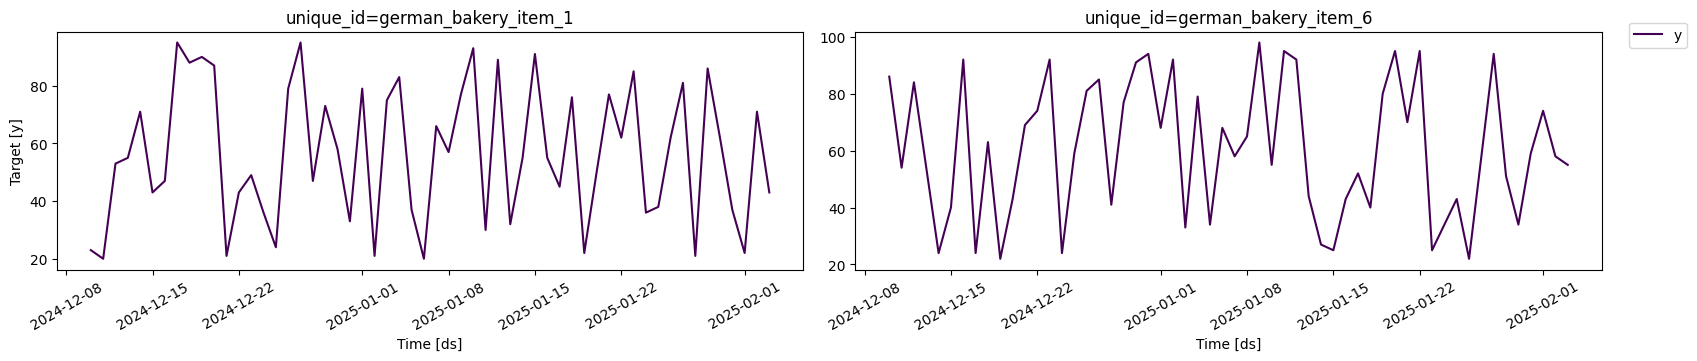

In [189]:
# In order to zoom in the data 
plot_series(
    df = df,
    ids=["german_bakery_item_1", "german_bakery_item_6"],
    max_insample_length = 56,  # The plot shows only the most recent 56 days. Older history is hidden to reduce clutter. 56 days = 8 weeks
    palette = "viridis"
)

**Base_line Model**

In [190]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, HistoricAverage, SeasonalNaive,WindowAverage 
# Naive Forecasts (tells Tomorrow will be the same as today.) future values by repeating the last observed value.
# SeasonalNaive (This Monday will behave like last Monday) Repeats the value from the same season in the past (e.g., last week)
# HistoricAverage (Predicts the mean of all historical values) Forecasts by taking the average of all past values. 
# WindowAverage (Predicts the average of the last N points (recent history)) Forecasts using the average of the most recent window of observations.

In [191]:
# As we have daily data so its reasonable to expect forecast the sale for next week(for 7 days) so we set horizon 7 days 
horizon = 7 
# With statsforecast, we can fit list of models at the same time
models = [
    Naive(),
    HistoricAverage(),
    WindowAverage(window_size=7),   # It will look at the dataset and take evrage of last 7 days and forecast that into the future 
    SeasonalNaive(season_length=7) # As dataset contain daily data and 7 days a week is taken
]

# Initialize statsforecast object which is responsible for training, fitting, predicting, cross_validation 
sf = StatsForecast(models = models, freq= "D")  # set freq as "D" representing daily 
sf.fit(df=df)
preds = sf.predict(h=horizon)


In [192]:
preds.head(20)

,unique_id,ds,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,german_bakery_item_1,2025-02-04,43.0,60.555000,48.857143,21.0
1,german_bakery_item_1,2025-02-05,43.0,60.555000,48.857143,86.0
2,german_bakery_item_1,2025-02-06,43.0,60.555000,48.857143,62.0
3,german_bakery_item_1,2025-02-07,43.0,60.555000,48.857143,37.0
4,german_bakery_item_1,2025-02-08,43.0,60.555000,48.857143,22.0
5,german_bakery_item_1,2025-02-09,43.0,60.555000,48.857143,71.0
6,german_bakery_item_1,2025-02-10,43.0,60.555000,48.857143,43.0
7,german_bakery_item_10,2025-02-04,85.0,58.047501,58.142857,32.0
8,german_bakery_item_10,2025-02-05,85.0,58.047501,58.142857,48.0
9,german_bakery_item_10,2025-02-06,85.0,58.047501,58.142857,25.0


In [193]:
preds.value_counts()

unique_id             ds          Naive  HistoricAverage  WindowAverage  SeasonalNaive
german_bakery_item_1  2025-02-04  43.0   60.555000        48.857143      21.0             1
                      2025-02-05  43.0   60.555000        48.857143      86.0             1
                      2025-02-06  43.0   60.555000        48.857143      62.0             1
                      2025-02-07  43.0   60.555000        48.857143      37.0             1
                      2025-02-08  43.0   60.555000        48.857143      22.0             1
                                                                                         ..
german_bakery_item_9  2025-02-06  97.0   60.012501        59.285713      35.0             1
                      2025-02-07  97.0   60.012501        59.285713      41.0             1
                      2025-02-08  97.0   60.012501        59.285713      85.0             1
                      2025-02-09  97.0   60.012501        59.285713      48.0        

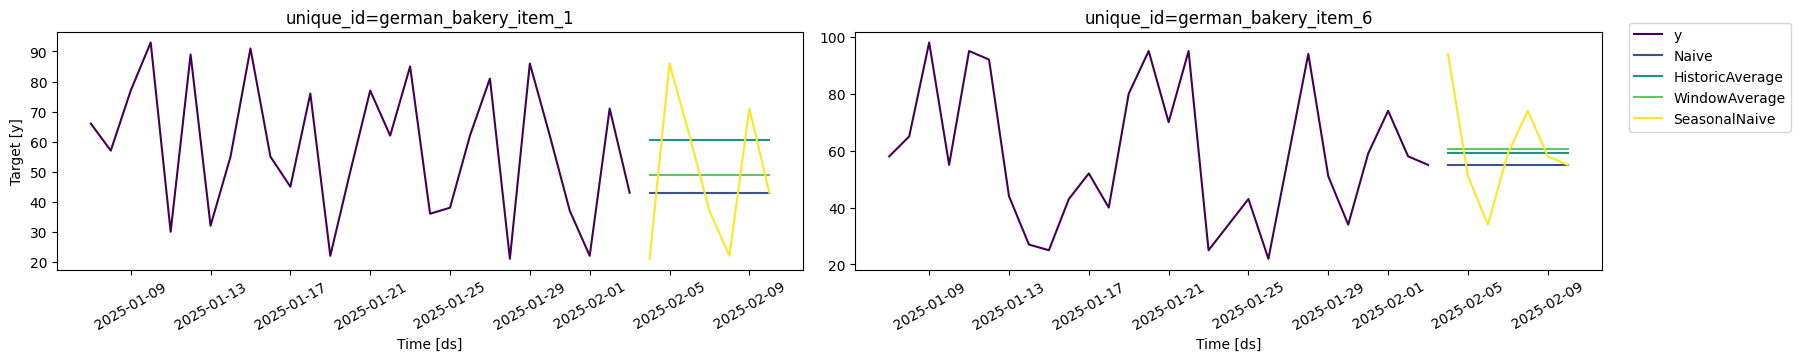

In [194]:
# Models like HistoricAverage, WindowAverage shows the horizontal and SeasonalNaive simply repeats the last 7 days 
# complete baseline forecasting comparison (It shows the last 28 days of actual sales and the forecasts produced by four baseline models for two bakery products)
# Four Models lines appear after the last purple point(Actual Dalily sale line) because they are future forecasts.
plot_series(
    df = df, 
    forecasts_df = preds, 
    ids = ["german_bakery_item_1", "german_bakery_item_6"],
    max_insample_length= 28, 
    palette= "viridis"

)

**Evaluate Baseline Model**

In [195]:
# Ensure time ordering 
df = df.sort_values(['unique_id', 'ds'])


In [196]:
# Sorts the DataFrame first by unique_id, then by ds (usually a datetime column).
# Ensures the data for each unique_id is in chronological order.
df = (
    df.sort_values(['unique_id','ds'])  # Step 1
      .groupby('unique_id', group_keys=False)  # Step 2
      .apply(lambda x: x.set_index('ds').asfreq('D').reset_index())  # Step 3
)


In [197]:
df.columns

Index(['ds', 'unique_id', 'y'], dtype='object')

In [199]:
test = df.groupby('unique_id').tail(7)
train = df.drop(test.index).reset_index(drop=True)   # test.index are row labels (row numbers) of test set to be dropped, 
                                                     # .reset_index(drop=True) ---> After dropping rows, resets row numbering

In [200]:
# Validate the split (Pandas is only showing the first few rows (default behavior), 10 items × 7 days = 70 rows)
test.groupby('unique_id').size().head()

unique_id
german_bakery_item_1     7
german_bakery_item_10    7
german_bakery_item_2     7
german_bakery_item_3     7
german_bakery_item_4     7
dtype: int64

In [201]:
train.groupby('unique_id').size().min()

np.int64(393)

In [202]:
# Here we would Train models on past data, Forecast the next horizon days, Align predictions with real outcomes for evaluation 
sf.fit(df = train)    # .fit(...) trains all models inside sf
preds = sf.predict(h=horizon)   # h=horizon Number of future time steps to predict
eval_df = pd.merge(test, preds, "left", ['ds', 'unique_id']) # pd.merge(...) Joins actual values with predicted values
                                                             # "left" Left join means keep every row from test, even if a prediction is missing.
                                                             # ['ds', 'unique_id'] join keys, rows match when: Same item (unique_id) and Same date (ds)

In [203]:
# mae take average of the absolute distance between the predictions and actual values 
# we have mae for each of our method 
# StatsForecast does not forecast “rows” — it forecasts “calendar steps, so when there will be irregularity in dates so the mae for methods would be nan
# But in this case we have regular dates data so got 'mae' values for all methods
evaluation = evaluate(
    eval_df,
    metrics= [mae], 
)
evaluation.head()

,unique_id,metric,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,german_bakery_item_1,mae,33.571429,22.394766,23.000000,23.857143
1,german_bakery_item_10,mae,21.714286,21.577972,22.836734,30.714286
2,german_bakery_item_2,mae,28.000000,21.969102,22.204081,24.000000
3,german_bakery_item_3,mae,22.571429,20.575790,19.428571,22.000000
4,german_bakery_item_4,mae,35.142857,14.651763,18.612243,27.714286


In [204]:
# There are no missing values (NaN) in y, Naive, or SeasonalNaive.
# we merge successfully aligned predictions with actuals.
# Now we can safely compute metrics like MAE, RMSE, etc. without worrying about NaNs.
eval_df[['y', 'Naive', 'SeasonalNaive']].isna().mean()


y                0.0
Naive            0.0
SeasonalNaive    0.0
dtype: float64

In [205]:
# We have lot of unique_ids so to get average of mae to have the overall idea of the performance of each model 
# so we get average of mae for each unique_id and for each model 
evaluation = evaluation.drop(['unique_id'],axis = 1).groupby('metric').mean().reset_index()    
                           # .drop(['unique_id'],axis = 1 Drops the column unique_id from the DataFrame.
                           # .groupby('metric') Groups the DataFrame by the values in the column metric
                           # .mean() Computes the mean of all numeric columns within each group. (calculate the average across all unique_ids for each metric.)
                           # .reset_index() moves it back to a normal column so the DataFrame is easy to read and use.



In [206]:
# As Lower MAE → predictions are closer to actuals → better model performance.
# HistoricAverage has the lowest MAE (~19.97), so it predicted closest to actual sales.
# Naive and SeasonalNaive performed worse, with Naive having the highest MAE (~29.17).
evaluation

,metric,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,mae,29.171429,19.971138,20.122448,25.171429


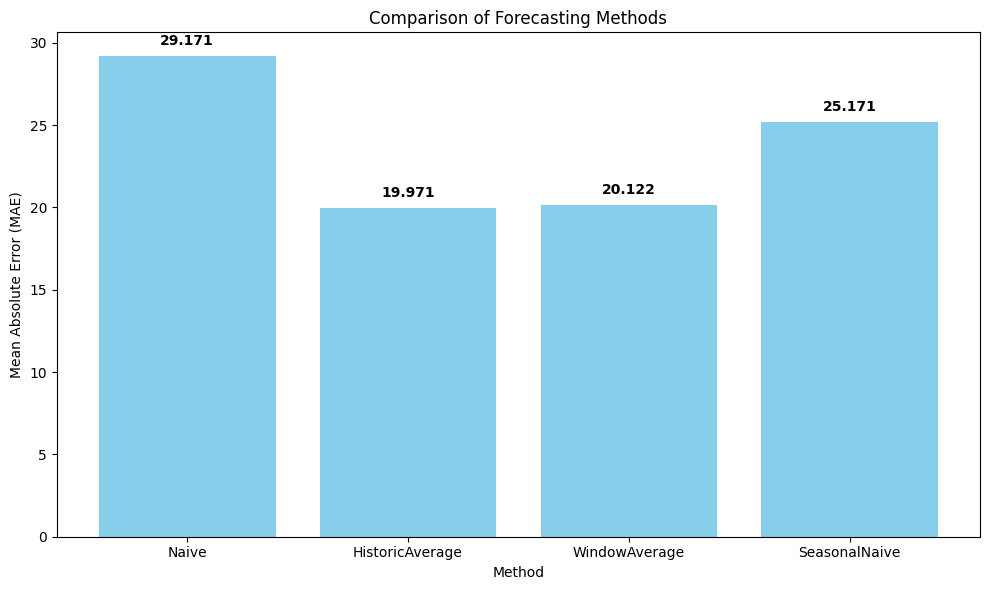

In [207]:
# Make a bar chart of MAE values per method
# As graph also represents that lowest value is of HistoricAverage 
methods = evaluation.columns[1:].tolist()       # take all coulumns except first means exclude MAE values 
values = evaluation.iloc[0,1:].tolist()         # Takes first rows values i.e. MAE values 

plt.figure(figsize=(10,6))
bars = plt.bar(methods, values, color='skyblue')
    
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value:.3f}',
             ha='center', va='bottom', fontweight='bold')    

plt.xlabel('Method')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Forecasting Methods')
plt.tight_layout()

plt.show()

**AutoARIMA**

In [208]:
from statsforecast.models import AutoARIMA

In [211]:
unique_ids = ["german_bakery_item_1", "german_bakery_item_6"]

small_train = train[train["unique_id"].isin(unique_ids)]
small_test = test[test["unique_id"].isin(unique_ids)]

models = [
    AutoARIMA(seasonal= False, alias = "ARIMA"),
    AutoARIMA(season_length=7, alias="SARIMA") 
]

sf = StatsForecast(models=models, freq="D")
sf.fit(df = small_train)
arima_preds = sf.predict(h=horizon)

arima_eval_df = pd.merge(arima_preds, eval_df, 'inner', ['ds', 'unique_id'])
arima_eval = evaluate(
    arima_eval_df, 
    metrics= [mae],
)                

arima_eval

,unique_id,metric,ARIMA,SARIMA,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,german_bakery_item_1,mae,24.084393,23.763838,33.571429,22.394766,23.000000,23.857143
1,german_bakery_item_6,mae,12.664122,12.664122,12.428571,12.664122,15.591836,24.571429


In [212]:
arima_eval = arima_eval.drop(["unique_id"], axis = 1).groupby("metric").mean().reset_index()


In [213]:
# That the metric values overlall 
# So here the lowest values if of still HistoricAverage so that is best 
arima_eval

,metric,ARIMA,SARIMA,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,mae,18.374258,18.21398,23.0,17.529444,19.295918,24.214286


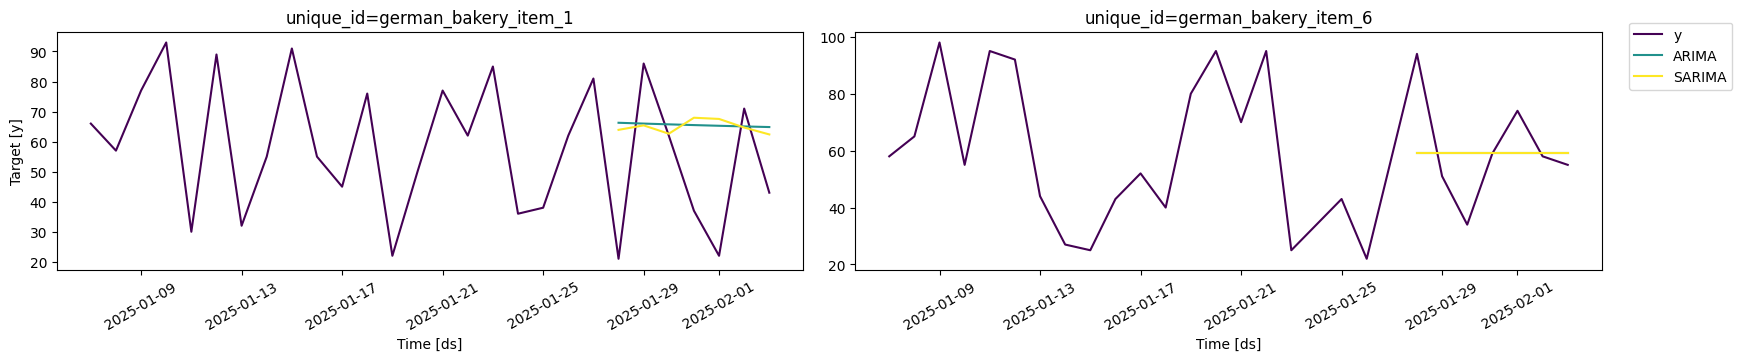

In [214]:
plot_series(
    df=df, 
    forecasts_df=arima_preds,
    ids = ["german_bakery_item_1", "german_bakery_item_6"],
    max_insample_length = 28, 
    palette = "viridis"
)

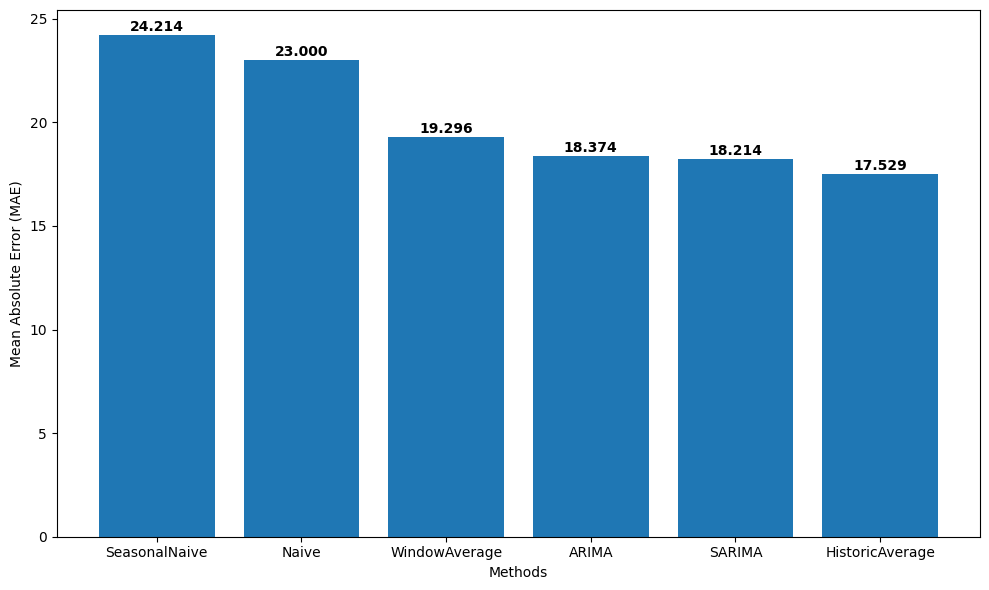

In [215]:
methods = arima_eval.columns[1:].tolist()
values = arima_eval.iloc[0,1:].tolist()

sorted_data = sorted(zip(methods, values), key = lambda x:x[1], reverse = True)
methods_sorted, values_sorted = zip(*sorted_data)

plt.figure(figsize=(10,6))
bars = plt.bar(methods_sorted, values_sorted)

for bar, value in zip(bars, values_sorted):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.05,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
plt.xlabel('Methods') 
plt.ylabel('Mean Absolute Error (MAE)')
plt.tight_layout()

plt.show()


**Cross Validation**

In [216]:
# To evaluate the forecasting model best way is cross validation 
# That is considered to be best way to forecast model 
# It uses the past data to evaluate the model
small_df = df[df['unique_id'].isin(unique_ids)]

models = [
    HistoricAverage(),
    SeasonalNaive(season_length=7),
    AutoARIMA(seasonal= False, alias = 'ARIMA'),
    AutoARIMA(season_length=7, alias='SARIMA') 

]

sf = StatsForecast(models=models, freq='D')
cv_df = sf.cross_validation(
    h=horizon, 
    df=small_df, 
    n_windows = 8,    # because 7*8=56 as we took above as it is considered as reasonable sample size 
    step_size = horizon,    # detremines distance between starting date of each window
                          # if teh step_size i sless than horison so we will have overlapping windows    
    refit = True    # it determines wether we will refit  or reoptimize model everytime the input_size changes 
# If model is updated everytime we make forecast that everytime we get data so we should set refit equals to True 
# If we are going to train model once and run forecast for a while and let say after 3-4 months the model is being 
# in production and we refit then we should set refit = False as by making it false it makes the entire process faster 
# while making it True makes it slower becasue we rae reoptimizing and refitting model for every window and it give 
# some better performance
    
)

In [218]:
cv_df.head()

,unique_id,ds,cutoff,y,HistoricAverage,SeasonalNaive,ARIMA,SARIMA
0,german_bakery_item_1,2024-12-10,2024-12-09,23.0,61.209301,94.0,61.055542,58.006409
1,german_bakery_item_1,2024-12-11,2024-12-09,20.0,61.209301,68.0,61.070240,60.570435
2,german_bakery_item_1,2024-12-12,2024-12-09,53.0,61.209301,99.0,61.083958,56.620323
3,german_bakery_item_1,2024-12-13,2024-12-09,55.0,61.209301,22.0,61.096760,65.209511
4,german_bakery_item_1,2024-12-14,2024-12-09,71.0,61.209301,46.0,61.108707,63.198158


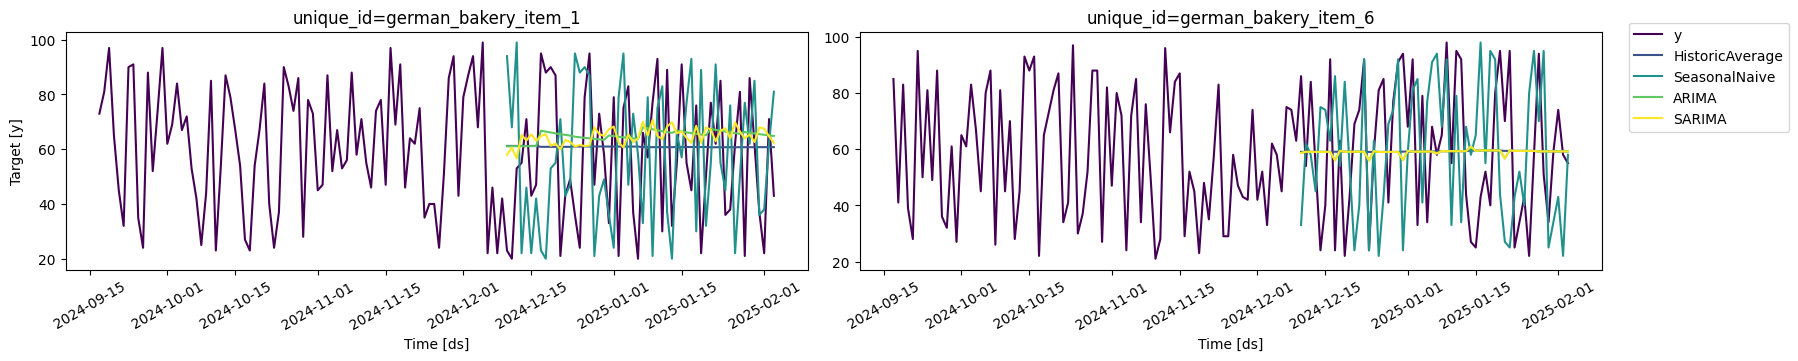

In [219]:
plot_series(
    df=small_df, 
    forecasts_df=cv_df.drop(['y', 'cutoff'], axis=1),
    ids = ["german_bakery_item_1", "german_bakery_item_6"],
    max_insample_length=140, 
    palette = 'viridis'
)

# SeasonalNaive performs poorly
# HistoricAverage performs well
# SARIMA does not improve much over ARIMA

In [220]:
cv_eval = evaluate(
    cv_df.drop(['cutoff'], axis=1), 
    metrics=[mae],
)

cv_eval = cv_eval.drop(['unique_id'], axis=1).groupby('metric').mean().reset_index()
cv_eval

,metric,HistoricAverage,SeasonalNaive,ARIMA,SARIMA
0,mae,20.92868,30.964287,21.112173,20.987637


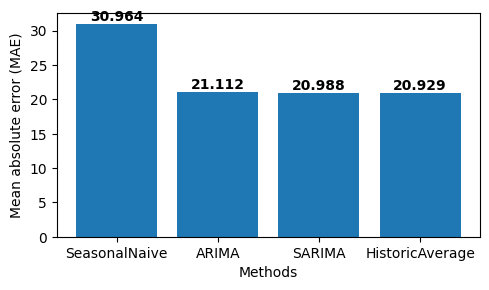

In [221]:
methods = cv_eval.columns[1:].tolist()
values = cv_eval.iloc[0,1:].tolist()

sorted_data = sorted(zip(methods, values), key = lambda x:x[1], reverse=True)
methods_sorted, values_sorted = zip(*sorted_data)

plt.figure(figsize=(5,3))
bars = plt.bar(methods_sorted, values_sorted)

for bar, value in zip(bars, values_sorted):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Methods')
plt.ylabel('Mean absolute error (MAE)')
plt.tight_layout()

plt.show()

# so it proves that the HistoricAverage Model in this case performs well as compared to all other models

**Forecasting with exogenous features**

In [222]:
# We can make use of external variable or exogenous features that are not part of Time series 
# Here unit_price woudlbe considered as exogenous variable
df = pd.read_csv("german_bakery_items.csv", parse_dates=['ds'])
df = df.groupby('unique_id').filter(lambda x: len(x) >= 28)
df.head()

,unique_id,ds,y,unit_price
0,german_bakery_item_1,2024-01-01,73,1.93
1,german_bakery_item_1,2024-01-02,62,1.73
2,german_bakery_item_1,2024-01-03,59,1.67
3,german_bakery_item_1,2024-01-04,46,4.82
4,german_bakery_item_1,2024-01-05,70,3.87


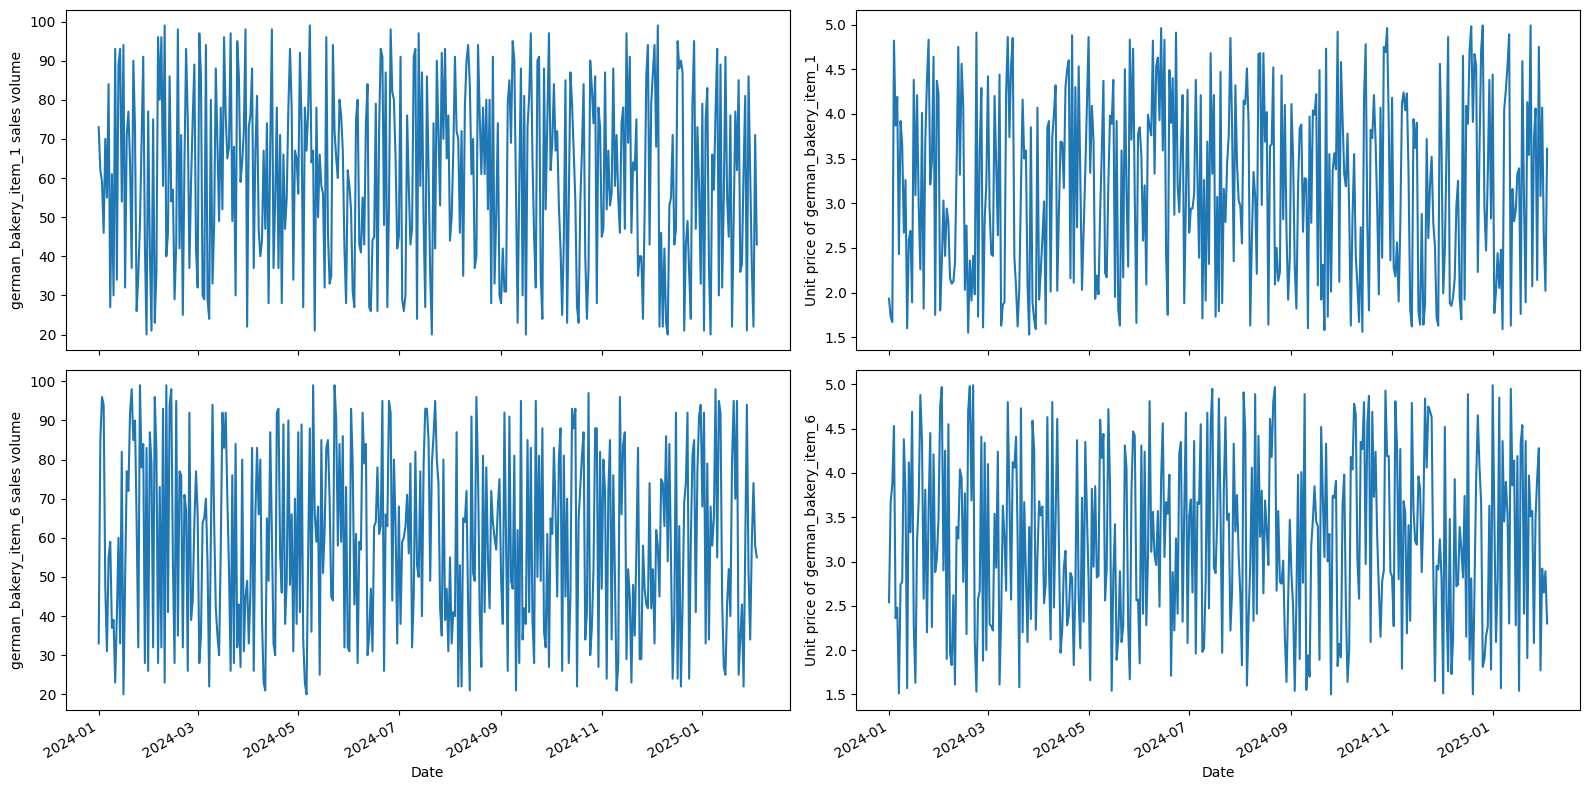

In [223]:
german_bakery_item_1_plot_df = df[df["unique_id"] == "german_bakery_item_1"]
german_bakery_item_6_plot_df = df[df["unique_id"] == "german_bakery_item_6"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

ax1.plot(german_bakery_item_1_plot_df['ds'], german_bakery_item_1_plot_df['y'])
ax1.set_xlabel('Date')
ax1.set_ylabel('german_bakery_item_1 sales volume')

ax2.plot(german_bakery_item_1_plot_df['ds'], german_bakery_item_1_plot_df["unit_price"])
ax2.set_xlabel('Date')
ax2.set_ylabel('Unit price of german_bakery_item_1')

ax3.plot(german_bakery_item_6_plot_df['ds'], german_bakery_item_6_plot_df['y'])
ax3.set_xlabel('Date')
ax3.set_ylabel('german_bakery_item_6 sales volume')

ax4.plot(german_bakery_item_6_plot_df['ds'], german_bakery_item_6_plot_df['unit_price'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Unit price of german_bakery_item_6')

fig.autofmt_xdate()
plt.tight_layout()


In [224]:
unique_ids = ["german_bakery_item_1", "german_bakery_item_6"]
small_df = df[df["unique_id"].isin(unique_ids)]
test = small_df.groupby("unique_id").tail(7)
train = small_df.drop(test.index).reset_index(drop=True)

In [225]:
future_exoge_factor = test.drop(['y'], axis=1)
future_exoge_factor

,unique_id,ds,unit_price
393,german_bakery_item_1,2025-01-28,2.14
394,german_bakery_item_1,2025-01-29,4.75
395,german_bakery_item_1,2025-01-30,3.08
396,german_bakery_item_1,2025-01-31,4.07
397,german_bakery_item_1,2025-02-01,2.64
398,german_bakery_item_1,2025-02-02,2.02
399,german_bakery_item_1,2025-02-03,3.61
2393,german_bakery_item_6,2025-01-28,3.95
2394,german_bakery_item_6,2025-01-29,4.28
2395,german_bakery_item_6,2025-01-30,1.77


In [226]:
# Define Model 

models = [
    AutoARIMA(season_length = 7, alias = "SARIMA_exog"),
    HistoricAverage()
]

sf = StatsForecast(models=models, freq = "D")

sf.fit(df=train)

# Predict with exogenous features 

arima_exog_preds = sf.predict(h=horizon, X_df=future_exoge_factor)

models = [
    AutoARIMA(season_length = 7, alias = "SARIMA_exog"),
    HistoricAverage()
]

sf = StatsForecast(models = models, freq = "D")
sf.fit(df = train.drop(['unit_price'], axis = 1))
arima_preds= sf.predict(h=horizon)

In [227]:
test_df = test.merge(arima_exog_preds, on=["unique_id", "ds"], how="left")\
              .merge(arima_preds, on=["unique_id", "ds"], how="left")

In [228]:
test_df.head()

,unique_id,ds,y,unit_price,SARIMA_exog_x,HistoricAverage_x,SARIMA_exog_y,HistoricAverage_y
0,german_bakery_item_1,2025-01-28,21,2.14,64.294206,60.763359,63.916439,60.763359
1,german_bakery_item_1,2025-01-29,86,4.75,64.905514,60.763359,65.402626,60.763359
2,german_bakery_item_1,2025-01-30,62,3.08,62.650521,60.763359,62.627422,60.763359
3,german_bakery_item_1,2025-01-31,37,4.07,67.651317,60.763359,67.950455,60.763359
4,german_bakery_item_1,2025-02-01,22,2.64,67.793946,60.763359,67.550667,60.763359


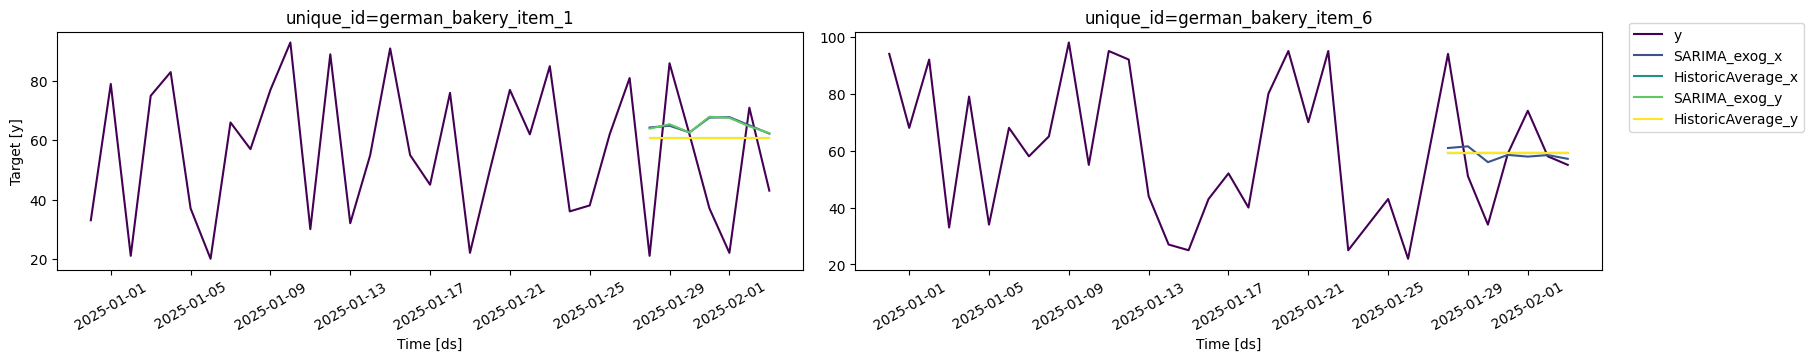

In [229]:
plot_series(
    df = train, 
    forecasts_df = test_df, 
    ids=["german_bakery_item_1", "german_bakery_item_6"], 
    max_insample_length = 28, 
    models = ['SARIMA_exog_x',
       'HistoricAverage_x', 'SARIMA_exog_y', 'HistoricAverage_y'], 
    palette = "viridis"

)

In [230]:
test_df.columns

Index(['unique_id', 'ds', 'y', 'unit_price', 'SARIMA_exog_x',
       'HistoricAverage_x', 'SARIMA_exog_y', 'HistoricAverage_y'],
      dtype='object')

In [231]:
models = [

    HistoricAverage(),
    AutoARIMA(season_length = 7, alias ="SARIMA_exog")
    
]

sf = StatsForecast(models = models, freq="D")

# Run cross_validation 
cv_exog_df = sf.cross_validation(
    h=horizon, 
    df=small_df,
    n_windows =8, 
    step_size=horizon, 
    refit= True


)

In [232]:
cv_exog_df.head()

,unique_id,ds,cutoff,y,HistoricAverage,SARIMA_exog
0,german_bakery_item_1,2024-12-10,2024-12-09,23.0,61.209302,58.118312
1,german_bakery_item_1,2024-12-11,2024-12-09,20.0,61.209302,60.507935
2,german_bakery_item_1,2024-12-12,2024-12-09,53.0,61.209302,57.089601
3,german_bakery_item_1,2024-12-13,2024-12-09,55.0,61.209302,66.033200
4,german_bakery_item_1,2024-12-14,2024-12-09,71.0,61.209302,62.564936


In [233]:
cv_exog_eval = evaluate(
    cv_exog_df.drop(["cutoff"], axis=1), 
    metrics=[mae],
)
cv_exog_eval = cv_exog_eval.drop(['unique_id'], axis=1).groupby('metric').mean().reset_index()


In [234]:
cv_exog_eval

,metric,HistoricAverage,SARIMA_exog
0,mae,20.928682,21.140807


**Creating Features from Timestamps**

In [235]:
from functools import partial 
from utilsforecast.feature_engineering import fourier, pipeline, time_features

In [236]:
features = [
    partial(fourier, season_length=7, k=2),    # Here k is no. of terms that determines how many signs and sosigns we want to encode seasonal information 
# Increase no. of k like 1,2,3 there would be increased in the terms we can use and more precise encoding would be  
# Here k=2 means we would have 2 sign terms and 2 cosign terms as given below, and this is a seasonality informations encoded in these features     
    partial(time_features, features=["day", "week", "month"])

]

small_exog_df, future_exoge_df = pipeline(
    df = small_df, 
    features = features, 
    h = horizon, 
    freq = "D"
)

 

In [237]:
small_exog_df.head()

,unique_id,ds,y,unit_price,sin1_7,sin2_7,cos1_7,cos2_7,day,week,month
0,german_bakery_item_1,2024-01-01,73,1.93,0.781832,0.974928,0.623490,-0.222521,1,1,1
1,german_bakery_item_1,2024-01-02,62,1.73,0.974928,-0.433884,-0.222521,-0.900969,2,1,1
2,german_bakery_item_1,2024-01-03,59,1.67,0.433884,-0.781831,-0.900969,0.623490,3,1,1
3,german_bakery_item_1,2024-01-04,46,4.82,-0.433884,0.781832,-0.900969,0.623490,4,1,1
4,german_bakery_item_1,2024-01-05,70,3.87,-0.974928,0.433884,-0.222521,-0.900969,5,1,1


In [238]:
future_exoge_df.head()

,unique_id,ds,sin1_7,sin2_7,cos1_7,cos2_7,day,week,month
0,german_bakery_item_1,2025-02-04,0.974926,-0.433900,-0.222530,-0.900961,4,6,2
1,german_bakery_item_1,2025-02-05,0.433889,-0.781838,-0.900966,0.623481,5,6,2
2,german_bakery_item_1,2025-02-06,-0.433893,0.781844,-0.900965,0.623474,6,6,2
3,german_bakery_item_1,2025-02-07,-0.974927,0.433893,-0.222526,-0.900965,7,6,2
4,german_bakery_item_1,2025-02-08,-0.781825,-0.974933,0.623498,-0.222500,8,6,2


In [239]:
# Now Train this model and see results 
models = [
    AutoARIMA(season_length = 7, alias = "SARIMA_time_exog"), 
    HistoricAverage()
]

sf = StatsForecast(models = models, freq="D")
cv_time_exog_df = sf.cross_validation(
    h = horizon, 
    df = small_exog_df, 
    n_windows = 8, 
    step_size = horizon, 
    refit = True, 

)

cv_time_exog_eval = evaluate(
    cv_time_exog_df.drop(["cutoff"], axis=1),
    metrics = [mae],
)

cv_time_exog_eval = cv_time_exog_eval.drop(["unique_id"], axis = 1).groupby('metric').mean().reset_index()

In [240]:
cv_time_exog_eval

,metric,SARIMA_time_exog,HistoricAverage
0,mae,26.734797,20.928682


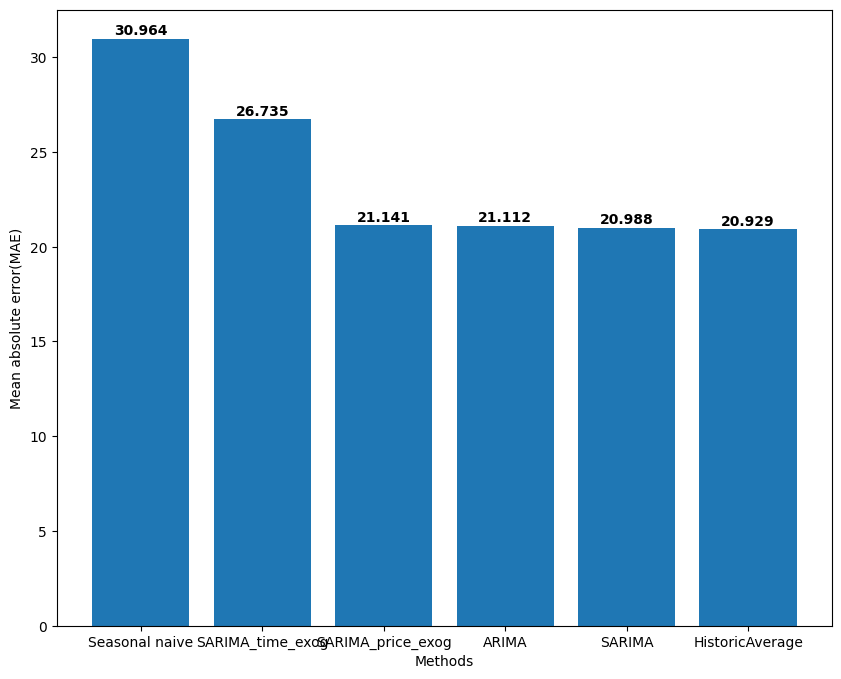

In [241]:
methods = ["ARIMA", "Seasonal naive", "SARIMA_price_exog", "SARIMA_time_exog", "SARIMA", "HistoricAverage"]
values = [21.112173, 30.964287, 21.140807, 26.734797, 20.987637, 20.928682]

sorted_data = sorted(zip(methods, values), key=lambda x: x[1], reverse = True)
methods_sorted, values_sorted = zip(*sorted_data)

plt.figure(figsize=(10,8))
bars = plt.bar(methods_sorted, values_sorted)

for bar, value in zip(bars, values_sorted):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value:.3f}', ha="center", va="bottom", fontweight="bold")
    
plt.xlabel("Methods")
plt.ylabel("Mean absolute error(MAE)")
plt.tight_layout

plt.show()

**Predict Interval to avoid uncertainty**

In [242]:
# Let say with 95% prediction intervals, we expect the actual value to have a 95% chance of falling inside that interval
# Stochastic model can inherently generates prediction intervals because uncertainty is embedded in their models
# ARIMA is a stochastic model because it includes an error term that follows the normal distribution

unique_ids = ["german_bakery_item_1", "german_bakery_item_6"]
small_df = df[df["unique_id"].isin(unique_ids)]
test = small_df.groupby("unique_id").tail(7)
train = small_df.drop(test.index).reset_index(drop=True)


In [243]:
train.head()

,unique_id,ds,y,unit_price
0,german_bakery_item_1,2024-01-01,73,1.93
1,german_bakery_item_1,2024-01-02,62,1.73
2,german_bakery_item_1,2024-01-03,59,1.67
3,german_bakery_item_1,2024-01-04,46,4.82
4,german_bakery_item_1,2024-01-05,70,3.87


In [244]:
models = [
    AutoARIMA(season_length=7), 
    HistoricAverage()
]

sf = StatsForecast(models= models, freq="D")
sf.fit(df=train)
prob_preds = sf.predict(h=horizon, X_df=test.drop(["y"], axis = 1), level = [80])    # Here level is menas 80% we will get prediction interval and even we can pass 80, 90, 95 so then we will get 80%, 90%, 95% prediction intervals
# in most of the cases the 80% predcition interval is considered enough and reasonable  

In [246]:
test_df = test.merge(prob_preds, on=["unique_id", "ds"], how="left")

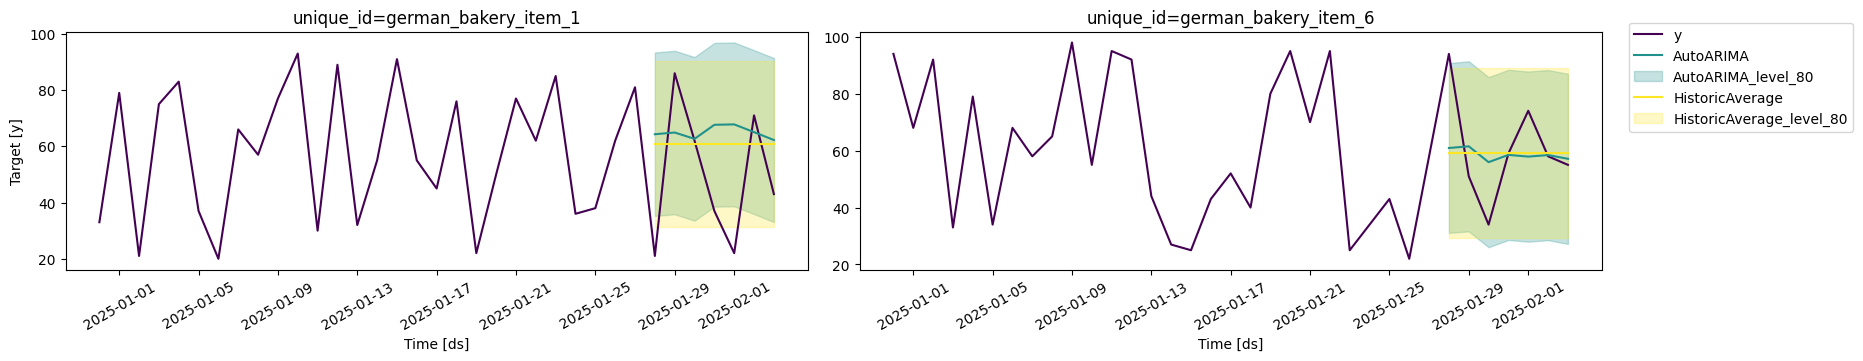

In [247]:
plot_series(
    df = train, 
    forecasts_df = test_df, 
    max_insample_length = 28, 
    level =[80], 
    models = ["AutoARIMA", "HistoricAverage"],    # Here we took two models
    ids = ["german_bakery_item_1", "german_bakery_item_6"], 
    palette = "viridis"
)

In [248]:
models = [
    AutoARIMA(season_length = 7), 
    HistoricAverage()
]

cv_prob_df = sf.cross_validation(
    h=horizon,
    step_size = horizon,
    df = small_df, 
    refit = True, 
    level = [80], 
    n_windows = 8

)


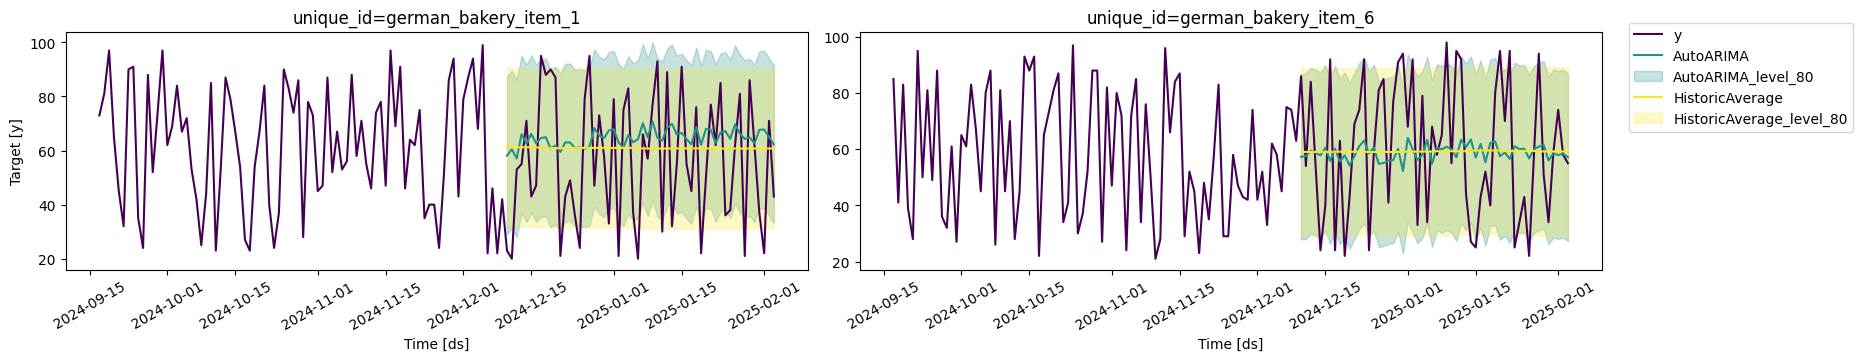

In [249]:
plot_series(
    df = small_df, 
    forecasts_df = cv_prob_df.drop(["y", "cutoff"], axis=1), 
    ids = ["german_bakery_item_1", "german_bakery_item_6"], 
    max_insample_length = 140,
    level = [80], 
    palette = "viridis", 
    models = ["AutoARIMA", "HistoricAverage"]

)

**Evaluation Metric**

In [250]:
# We need to use different evaluation metrics not only mae when prediction intervals
models = [
    AutoARIMA(season_length =7, alias = "SARIMA_exog"), 
    SeasonalNaive(season_length=7)
]

sf = StatsForecast(models = models, freq= "D")
final_cv_df = sf.cross_validation(
    df = small_df, 
    h = horizon, 
    step_size = 7, 
    n_windows = 8, 
    refit = True,
    level = [80]

)

In [251]:
final_cv_df.head()

,unique_id,ds,cutoff,y,SARIMA_exog,SARIMA_exog-lo-80,SARIMA_exog-hi-80,SeasonalNaive,SeasonalNaive-lo-80,SeasonalNaive-hi-80
0,german_bakery_item_1,2024-12-10,2024-12-09,23.0,58.118312,28.995629,87.240996,94.0,50.507291,137.492709
1,german_bakery_item_1,2024-12-11,2024-12-09,20.0,60.507935,31.385252,89.630619,68.0,24.507291,111.492709
2,german_bakery_item_1,2024-12-12,2024-12-09,53.0,57.089601,27.966918,86.212284,99.0,55.507291,142.492709
3,german_bakery_item_1,2024-12-13,2024-12-09,55.0,66.033200,36.910517,95.155883,22.0,-21.492709,65.492709
4,german_bakery_item_1,2024-12-14,2024-12-09,71.0,62.564936,33.442253,91.687620,46.0,2.507291,89.492709


In [252]:
# For sample Mean absolute error we have to create a temporary test data as 
temp_test = small_df.groupby("unique_id").tail(7*8)
temp_train = small_df.drop(test.index).reset_index(drop=True)

In [253]:
models = ["SARIMA_exog", "SeasonalNaive"]
metrics = [
    mae, 
    mse, 
    rmse, 
    mape, 
    smape, 
    partial(mase, seasonality=7), 
    scaled_crps
]

final_eval = evaluate(
    df = final_cv_df.drop(["ds", "cutoff"], axis = 1),
    metrics = metrics, 
    train_df = temp_train,     # This is just because of mase
    level = [80], 
    models = models
)

final_eval = final_eval.drop(["unique_id"], axis = 1).groupby('metric').mean().reset_index()



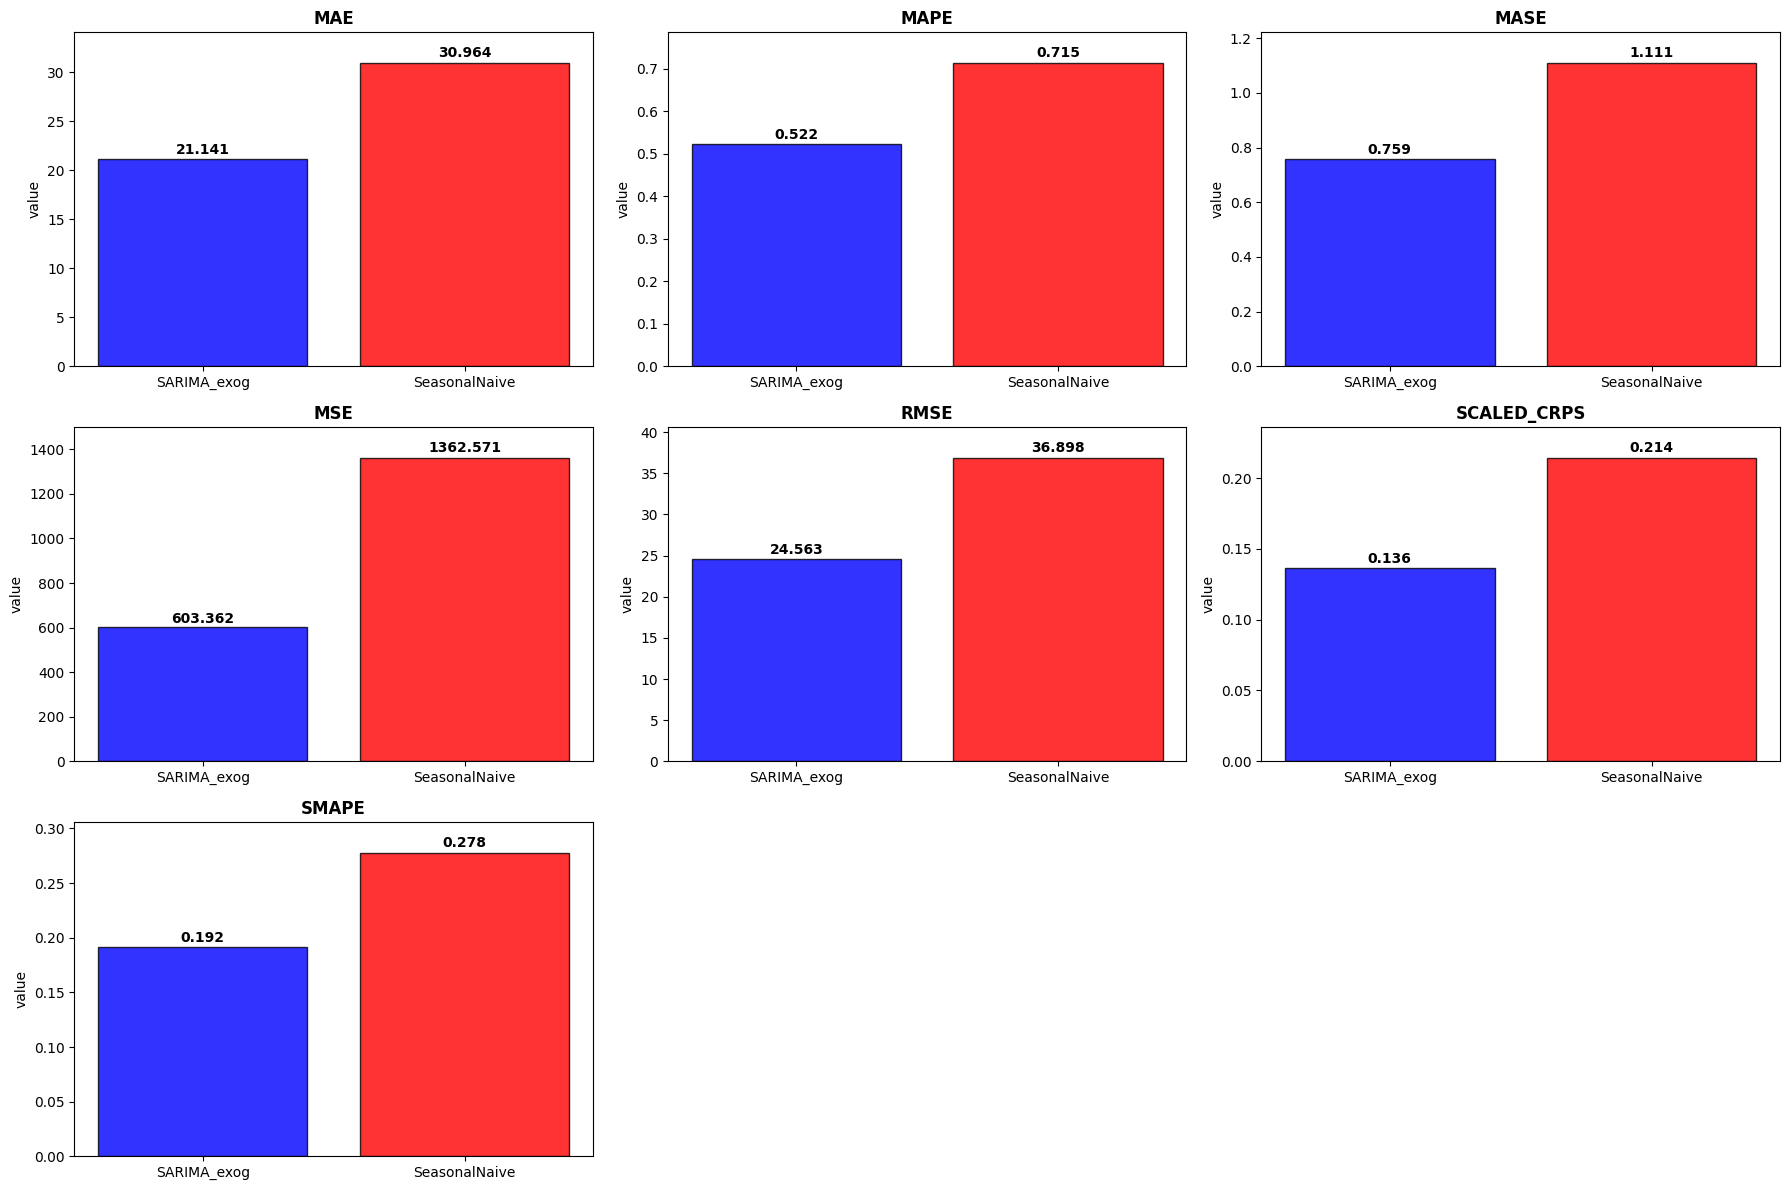

In [256]:
fig, axes = plt.subplots(3,3,figsize=(18,12))

axes_flat = axes.flatten()

models = ['SARIMA_exog', 'SeasonalNaive']
x_pos = [0,1]
colors = ['blue', 'red']

for i, row in final_eval.iterrows():
    ax = axes_flat[i]

    model_values = [row['SARIMA_exog'], row['SeasonalNaive']]

    bars = ax.bar(x_pos, model_values, color=colors, alpha=0.8, edgecolor = 'black', linewidth=1)

    for j, (bar, value) in enumerate(zip(bars, model_values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height * 0.01, 
                f'{value:.3f}', ha = 'center', va = 'bottom', fontweight='bold', fontsize=10)

    ax.set_title(row['metric'].upper(), fontweight = 'bold', fontsize = 12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models, ha = 'center')
    ax.set_ylabel('value')
    max_value = max(model_values)
    ax.set_ylim(0, max_value * 1.1)

fig.delaxes(axes_flat[7])

axes_flat[8].set_visible(False)

plt.tight_layout()
plt.show()

